In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from importlib_metadata import version

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


In [3]:

import sklearn
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [4]:
import plotly.express as px 
import plotly.graph_objects as go

In [46]:

# For check current version of libraries
def get_version_number(lib):
  return float('.'.join(version(lib).split('.')[0:2]))


# load dataset

In [7]:
df = pd.read_csv('well_exposure_modeling_dataset.csv', index_col=0)


In [8]:
RTN_list = list(df['RTN'].unique())

In [9]:
feature_list = [
              'elevation_well',
              'BROCKDEPMI_well',
              'WTDEPANNMI_well',
              'FLODFREQDC_well',
              'FLODFREQMA_well',
              'PONDFREQPR_well',
              'DRCLASSDCD_well',
              'DRCLASSWET_well',
              'HYDGRPDCD_well',
              'SLOPE_well',
              'SLOPEGRADD_well',
              'SLOPEGRADW_well',
              'map_unit_groups_well',
              'slope_phase_well',
              'primary_series_well',
              'secondary_series_well',
              'tertiary_series_well',
              'primary_texture_well',
              'secondary_texture_well',
              'tertiary_texture_well',
              'extra_desc_well',
              'slope_aspect_well',
              'elevation_ds',
              'BROCKDEPMI_ds',
              'WTDEPANNMI_ds',
              'FLODFREQDC_ds',
              'FLODFREQMA_ds',
              'PONDFREQPR_ds',
              'DRCLASSDCD_ds',
              'DRCLASSWET_ds',
              'HYDGRPDCD_ds',
              'SLOPE_ds',
              'SLOPEGRADD_ds',
              'SLOPEGRADW_ds',
              'map_unit_groups_ds',
              'slope_phase_ds',
              'primary_series_ds',
              'secondary_series_ds',
              'tertiary_series_ds',
              'primary_texture_ds',
              'secondary_texture_ds',
              'tertiary_texture_ds',
              'extra_desc_ds',
              'slope_aspect_ds',
              'elevation_ds_to_well',
              'days_since_release',
              'distance_ds_to_well',
              'bearing_ds_to_well']

# exclude compounds with almost all ND results
well_response_list = [
                      # '11Cl-PF 3OUdS_well',
                      # '9Cl-PF 3ONS_well',
                      # 'ADONA_well',
                      # 'HFPO-DA_well',
                      'NEtFOSAA_well',
                      # 'NMeFOSAA_well',
                      'PFBS_well',
                      'PFDA_well',
                      'PFDoA_well',
                      'PFHpA_well',
                      'PFHxA_well',
                      'PFHxS_well',
                      'PFNA_well',
                      'PFOA_well',
                      'PFOS_well',
                      'PFTA_well',
                      'PFTrDA_well',
                      'PFUnA_well']

DS_response_list = [
                    # '11Cl-PF 3OUdS_DS',
                    # '9Cl-PF 3ONS_DS',
                    # 'ADONA_DS',
                    # 'HFPO-DA_DS',
                    'NEtFOSAA_DS',
                    # 'NMeFOSAA_DS',
                    'PFBS_DS',
                    'PFDA_DS',
                    'PFDoA_DS',
                    'PFHpA_DS',
                    'PFHxA_DS',
                    'PFHxS_DS',
                    'PFNA_DS',
                    'PFOA_DS',
                    'PFOS_DS',
                    'PFTA_DS',
                    'PFTrDA_DS',
                    'PFUnA_DS']
                    


In [10]:
regulated=['PFDA_well',  
           'PFHpA_well', 
           'PFHxS_well',
           'PFNA_well', 
           'PFOA_well', 
           'PFOS_well']

regulated_DS=['PFDA_DS',  
              'PFHpA_DS', 
              'PFHxS_DS',
              'PFNA_DS', 
              'PFOA_DS', 
              'PFOS_DS']

unregulated=['11Cl-PF 3OUdS_well',
             '9Cl-PF 3ONS_well',
             'ADONA_well',
             'HFPO-DA_well',
             'NEtFOSAA_well',
             'NMeFOSAA_well',
             'PFBS_well',
             'PFDoA_well',
             'PFHxA_well',
             'PFTA_well',
             'PFTrDA_well',
             'PFUnA_well']

unregulated_DS=['11Cl-PF 3OUdS_DS',
                '9Cl-PF 3ONS_DS',
                'ADONA_DS',
                'HFPO-DA_DS',
                'NEtFOSAA_DS',
                'NMeFOSAA_DS',
                'PFBS_DS',
                'PFDoA_DS',
                'PFHxA_DS',
                'PFTA_DS',
                'PFTrDA_DS',
                'PFUnA_DS']


In [11]:
# drop features containing all NaN values
nan_list = list(df.columns[list(df.isna().sum()==df.shape[0])])

feature_list = [x for x in feature_list if x not in nan_list]
df_features = df[feature_list].copy()

In [12]:

# impute mean for negative days_since_release variable cases

df_features['RTN'] = df['RTN']

for rtn in RTN_list:
  df_features.loc[(df_features['RTN']==rtn) & (df_features['days_since_release'] < 0), 'days_since_release'] = np.NaN
  rtn_mean = df_features.loc[df_features['RTN'] == rtn, 'days_since_release'].mean()
  df_features.loc[(df_features['RTN']==rtn) & (pd.isna(df_features['days_since_release'])), 'days_since_release'] = rtn_mean



In [13]:

categorical_features = list(df_features[feature_list].columns[df_features[feature_list].dtypes=='object'])
numeric_features = list(df_features[feature_list].columns[(df_features[feature_list].dtypes=='float') | (df_features[feature_list].dtypes=='int')])


In [14]:

# impute feature NaNs with mean of RTN if numeric variable
for feature in numeric_features:
  for rtn in RTN_list:
    rtn_mean = df_features.loc[df_features['RTN'] == rtn, feature].mean(skipna=True)

    # use overall mean if all NaN for an RTN
    if np.isnan(rtn_mean):
        rtn_mean = df_features[feature].mean(skipna=True)

    df_features.loc[(df_features['RTN']==rtn) & (pd.isna(df_features[feature])), feature] = rtn_mean



In [15]:

# one hot encode categorical features

for feature in categorical_features:
    df_features[feature] = df_features[feature].astype('category').astype('str')
    
df_features.drop('RTN', axis=1, inplace=True)
df_features = pd.get_dummies(df_features, columns=categorical_features, prefix=categorical_features, drop_first=True)


In [16]:

# Remove features with low variance 
variance_threshold_pct = .1

from sklearn.feature_selection import VarianceThreshold
from itertools import compress

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
def fs_variance(df, threshold):

    features = list(df.columns)

    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select


keep_features = fs_variance(df_features, threshold=variance_threshold_pct)

print('variance_threshold_pct:',variance_threshold_pct)

print('num original features:',df.shape[1])
print('num selected features:',len(keep_features))


print('\nFeatures selected to be included:')
display(list(keep_features))

print('\nFeatures selected to be removed:')
display(list(df_features.drop(keep_features, axis=1).columns))



variance_threshold_pct: 0.1
num original features: 93
num selected features: 48

Features selected to be included:


['elevation_well',
 'WTDEPANNMI_well',
 'SLOPEGRADD_well',
 'SLOPEGRADW_well',
 'slope_aspect_well',
 'elevation_ds',
 'SLOPEGRADD_ds',
 'SLOPEGRADW_ds',
 'slope_aspect_ds',
 'elevation_ds_to_well',
 'days_since_release',
 'bearing_ds_to_well',
 'DRCLASSDCD_well_Moderately well drained',
 'DRCLASSDCD_well_Well drained',
 'DRCLASSDCD_well_nan',
 'DRCLASSWET_well_Moderately well drained',
 'DRCLASSWET_well_Well drained',
 'HYDGRPDCD_well_B',
 'HYDGRPDCD_well_C',
 'HYDGRPDCD_well_nan',
 'SLOPE_well_A',
 'SLOPE_well_B',
 'SLOPE_well_C',
 'map_unit_groups_well_Excessively drained to somewhat poorly drained soils formed in glacial outwash or lacustrine sediments',
 'map_unit_groups_well_Miscellaneous land types, urban land, and soils above series levels',
 'slope_phase_well_0 to 3 percent slopes',
 'slope_phase_well_3 to 8 percent slopes',
 'primary_series_well_riverhead',
 'primary_series_well_windsor',
 'primary_series_well_woodbridge',
 'primary_texture_well_loamy coarse sand',
 'primary_


Features selected to be removed:


['WTDEPANNMI_ds',
 'distance_ds_to_well',
 'PONDFREQPR_well_75-100%',
 'DRCLASSDCD_well_Poorly drained',
 'DRCLASSDCD_well_Very poorly drained',
 'DRCLASSWET_well_Poorly drained',
 'DRCLASSWET_well_Somewhat excessively drained',
 'DRCLASSWET_well_Very poorly drained',
 'DRCLASSWET_well_nan',
 'HYDGRPDCD_well_C/D',
 'HYDGRPDCD_well_D',
 'SLOPE_well_D',
 'map_unit_groups_well_Mapunits controlled by bedrock',
 'map_unit_groups_well_Water, poorly, and very poorly drained soils',
 'slope_phase_well_0 to 5 percent slopes',
 'slope_phase_well_0 to 8 percent slopes',
 'slope_phase_well_15 to 25 percent slopes',
 'slope_phase_well_3 to 15 percent slopes',
 'slope_phase_well_8 to 15 percent slopes',
 'slope_phase_well_nan',
 'primary_series_well_deerfield',
 'primary_series_well_freetown',
 'primary_series_well_hinckley',
 'primary_series_well_hollis',
 'primary_series_well_merrimac',
 'primary_series_well_nan',
 'primary_series_well_paxton',
 'primary_series_well_pits',
 'primary_series_well_ri

The sparcity of the current data leads many potentially important variables to be excluded during feature selection.  Instead, all features are included here to avoid model overfitting and provide more generalizability, though high dimensionality may result in poorer performance for some models.  Algorithms such as Random Forest which perform internal selection should not be affected.  

In [17]:

# impute DS response NaNs with mean of RTN

DS_responses = df[DS_response_list].copy()

if pd.isna(df[DS_response_list]).sum().sum() != 0:
    DS_responses['RTN'] = df['RTN']

    for response in DS_response_list:
      for rtn in RTN_list:
        rtn_mean = DS_responses.loc[DS_responses['RTN'] == rtn, response].mean(skipna=True)

        # use overall mean if all NaN for an RTN
        if np.isnan(rtn_mean):
            rtn_mean = DS_responses[response].mean(skipna=True)

        DS_responses.loc[(DS_responses['RTN']==rtn) & (pd.isna(DS_responses[response])), response] = rtn_mean

    DS_responses.drop('RTN', axis=1, inplace=True)


# Classification Model

In [18]:

# Finalize model datasets.  

# Set True to only use PFAS6 compounds in model, or False for all available PFAS compounds
ONLY_PFAS6 = True

# Set True to use only the sum of DS source PFAS compounds as the feature variable. 
# Set False to include the individual DS source PFAS result values. 
SUM_DS_RESULTS = False


regulatory_limit = 20


if ONLY_PFAS6:   # Only include PFAS 6 in model
    # use sum of DS PFAS instead of individual compounds
    DS_responses['DS_sum_regulated'] = DS_responses[regulated_DS].sum(axis=1)

    # create response variable.  Sum of detected PFAS compounds (either PFAS6 or all)
    df.loc[df[regulated].sum(axis=1)>=regulatory_limit, 'response_PFAS6'] = 1
    df.loc[df[regulated].sum(axis=1)<regulatory_limit, 'response_PFAS6'] = 0
            
    if SUM_DS_RESULTS:
      X = pd.concat((df_features, DS_responses['DS_sum_regulated']), axis=1)
    else:
      X = pd.concat((df_features, DS_responses[regulated_DS]), axis=1)

    y = df['response_PFAS6']


else:   # Include all available PFAS in model
    # use sum of DS PFAS instead of individual compounds
    DS_responses['DS_sum'] = DS_responses[DS_response_list].sum(axis=1)

    # create response variable.  Sum of detected PFAS compounds (either PFAS6 or all)
    df.loc[df[well_response_list].sum(axis=1)>=regulatory_limit, 'response_all'] = 1
    df.loc[df[well_response_list].sum(axis=1)<regulatory_limit, 'response_all'] = 0
        
    if SUM_DS_RESULTS:
      X = pd.concat((df_features, DS_responses['DS_sum']), axis=1)
    else:
      X = pd.concat((df_features, DS_responses[DS_response_list]), axis=1)

    y = df['response_all']


Xy = pd.concat((X,y),axis=1)


In [19]:

# First look.  try various models using default parameters

seed = 42
train_size = .7
k_folds = 5
n_repeats = 5


model_list = [LogisticRegression(random_state=seed),
              KNeighborsClassifier(),
              RandomForestClassifier(random_state=seed),
              SGDClassifier(random_state=seed),
              SVC(random_state=seed),
              AdaBoostClassifier(random_state=seed),
              GradientBoostingClassifier(random_state=seed)
              ]


results = []
results_df = pd.DataFrame()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=seed,
                                                    train_size=train_size)

for clf in model_list:

    model_str = str(type(clf))

    model = make_pipeline(StandardScaler(),
                          clf)
    
    rkf = RepeatedStratifiedKFold(n_splits=k_folds, 
                                  n_repeats=n_repeats,
                                  random_state=seed)

    cv_results = cross_validate(model, 
                                X_train, y_train, 
                                cv=rkf,
                                scoring=['accuracy','recall', 'precision', 'f1', 'roc_auc'])

    results.append({'model':model_str, 
                    'cv_accuracy':cv_results['test_accuracy'].mean(),  
                    'cv_precision':cv_results['test_precision'].mean(),                      
                    'cv_recall':cv_results['test_recall'].mean(),
                    'cv_f1':cv_results['test_f1'].mean(),
                    'cv_ROC':cv_results['test_roc_auc'].mean()})


results_df = pd.DataFrame(results)

In [51]:
np.round(results_df,3)

,model,cv_accuracy,cv_precision,cv_recall,cv_f1,cv_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.736,0.728,0.604,0.644,0.809
1,<class 'sklearn.neighbors._classification.KNei...,0.734,0.726,0.589,0.637,0.805
2,<class 'sklearn.ensemble._forest.RandomForestC...,0.739,0.713,0.635,0.662,0.833
3,<class 'sklearn.linear_model._stochastic_gradi...,0.698,0.651,0.625,0.621,0.752
4,<class 'sklearn.svm._classes.SVC'>,0.740,0.764,0.549,0.626,0.765
5,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.749,0.722,0.665,0.684,0.810
6,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.769,0.748,0.691,0.709,0.860


In [21]:

# Model tuning pipeline.  Get best params, CV results, and save optimized models.

seed = 42

train_size = .6
k_folds = 5
prob_threshold = .5
n_repeats = 20


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        stratify=y,
                                        train_size=train_size,
                                        random_state=seed
                                        )


model_list = [
              LogisticRegression(random_state=seed, max_iter=1000),
              KNeighborsClassifier(),
              RandomForestClassifier(random_state=seed),
              SVC(random_state=seed, probability=True),
              # AdaBoostClassifier(random_state=seed),
              # GradientBoostingClassifier(random_state=seed)
              ]

params = [
          {'logisticregression__C': (0.01, 0.1, 0.2, 0.3),
          'logisticregression__solver': ['lbfgs', 'liblinear', 'sag'],
          'logisticregression__penalty': ['l2'],
          'logisticregression__class_weight': ['balanced', None]},

          {'kneighborsclassifier__n_neighbors': np.arange(1,25,1)},
          
          {'randomforestclassifier__n_estimators': [10,50,100,500],
          'randomforestclassifier__criterion': ['gini', 'entropy'],
          'randomforestclassifier__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'randomforestclassifier__min_samples_split': [2, 5, 10],
          'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8]
           },
          
          {'svc__C':(0.001, 0.01, 0.1, 0.2, 0.3, 0.5),
           'svc__kernel':['linear','poly','rbf','sigmoid']},
          
          # {'adaboostclassifier__n_estimators':[10,50,100,500,1000],
          #  'adaboostclassifier__learning_rate':(0.001, 0.01, 0.1, 0.2, 0.3, 0.5)},
          
          # {'gradientboostingclassifier__validation_fraction':[0.2],
          #  'gradientboostingclassifier__n_iter_no_change':[5],
          #  'gradientboostingclassifier__loss':['deviance','exponential'],
          #  'gradientboostingclassifier__min_samples_split': [2, 5, 10],
          #  'gradientboostingclassifier__min_samples_leaf': [1, 2, 4, 8],
          #  'gradientboostingclassifier__learning_rate':(0.001, 0.01, 0.1, 0.2, 0.3, 0.5),
          #  'gradientboostingclassifier__n_estimators':[10,50,100,500,1000]}    
          ]
                     

models=[]
best_params = []
model_results_df = pd.DataFrame()

print('\ntrain_size:', train_size,
      '\nk_folds:', k_folds,
      '\nn_repeats:', n_repeats)
      

for clf, param in zip(model_list, params):
  
    model_str = str(type(clf))
    print('\nmodel: ',model_str)

    model = make_pipeline(StandardScaler(),
                          clf)

    kf = StratifiedKFold(n_splits=k_folds, 
                        random_state=seed, 
                        shuffle=True)
    
    rkf = RepeatedStratifiedKFold(n_splits=k_folds, 
                                  n_repeats=n_repeats,
                                  random_state=seed
                                  )

    # perform search of parameters for each model, saving best configuration to model object.
    model = RandomizedSearchCV(model,
                               param,
                               cv=kf,
                               # random_state=seed,
                               n_iter=10,
                               scoring='recall')
                              #  scoring='accuracy')
    
    # rerun cross validation using best params and repeated stratified k-fold to control for model instability due to limited training data
    cv_results = cross_validate(model, 
                                X_train, y_train, 
                                cv=rkf,
                                scoring=['precision', 'accuracy', 'recall', 'f1', 'roc_auc']
                                )

    # output results
    print('cv_accuracy   mean: {:.2f} | sd: {:.2f}'. format(cv_results['test_accuracy'][~np.isnan(cv_results['test_accuracy'])].mean(), 
                                                            cv_results['test_accuracy'][~np.isnan(cv_results['test_accuracy'])].std()))
    
    print('cv_recall     mean: {:.2f} | sd: {:.2f}'. format(cv_results['test_recall'][~np.isnan(cv_results['test_recall'])].mean(), 
                                                            cv_results['test_recall'][~np.isnan(cv_results['test_recall'])].std()))
    
    print('cv_precision  mean: {:.2f} | sd: {:.2f}'. format(cv_results['test_precision'][~np.isnan(cv_results['test_precision'])].mean(), 
                                                            cv_results['test_precision'][~np.isnan(cv_results['test_precision'])].std()))
    
    print('cv_f1         mean: {:.2f} | sd: {:.2f}'. format(cv_results['test_f1'][~np.isnan(cv_results['test_f1'])].mean(), 
                                                            cv_results['test_f1'][~np.isnan(cv_results['test_f1'])].std()))
    
    print('cv_ROC        mean: {:.2f} | sd: {:.2f}'. format(cv_results['test_roc_auc'][~np.isnan(cv_results['test_roc_auc'])].mean(), 
                                                            cv_results['test_roc_auc'][~np.isnan(cv_results['test_roc_auc'])].std()))

    # save cv results for comparison of models and creation of ensembles
    cv_results_df = pd.DataFrame()
    cv_results_df['model'] = ''
    cv_results_df['test_accuracy'] = cv_results['test_accuracy']
    cv_results_df['test_recall'] = cv_results['test_recall']
    cv_results_df['test_precision'] = cv_results['test_precision']
    cv_results_df['test_f1'] = cv_results['test_f1']
    cv_results_df['test_roc_auc'] = cv_results['test_roc_auc']
    cv_results_df['model'] = model_str

    model_results_df = model_results_df.append(cv_results_df, ignore_index=True)
    model_results_df.reset_index(drop=True, inplace=True)
    
    # save fitted models with best params for testing
    model = model.fit(X_train, y_train)
    models.append(model)

    print('\nbest params:')
    print(model.best_params_)
    best_params.append(model.best_params_)




train_size: 0.6 
k_folds: 5 
n_repeats: 20

model:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
cv_accuracy   mean: 0.70 | sd: 0.08
cv_recall     mean: 0.68 | sd: 0.14
cv_precision  mean: 0.64 | sd: 0.11
cv_f1         mean: 0.65 | sd: 0.09
cv_ROC        mean: 0.79 | sd: 0.08

best params:
{'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 0.01}

model:  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
cv_accuracy   mean: 0.75 | sd: 0.07
cv_recall     mean: 0.67 | sd: 0.16
cv_precision  mean: 0.72 | sd: 0.12
cv_f1         mean: 0.68 | sd: 0.10
cv_ROC        mean: 0.79 | sd: 0.08

best params:
{'kneighborsclassifier__n_neighbors': 13}

model:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
cv_accuracy   mean: 0.75 | sd: 0.07
cv_recall     mean: 0.62 | sd: 0.15
cv_precision  mean: 0.75 | sd: 0.12
cv_f1         mean: 0.67 | sd: 0.11
cv_ROC        me

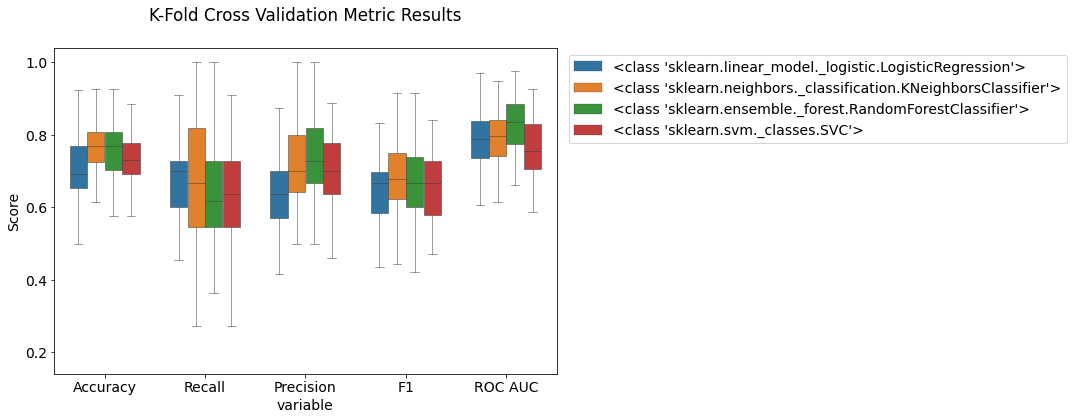

In [22]:

# plot cross validation scoring results

font = {'size'   : 14}
plt.rc('font', **font)

fig = plt.figure(figsize=(9,6))

sns.boxplot(data=model_results_df.melt('model'), y='value', x='variable', hue='model', width=.7,
            fliersize=0, whis=1.5, linewidth=.5
            )

plt.xticks(ticks=np.arange(0, 5), labels=['Accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC'], 
          #  rotation=45, rotation_mode='anchor', ha='right'
           )

plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('K-Fold Cross Validation Metric Results\n');


In [53]:
# CV results table
np.round(model_results_df.groupby('model', as_index=False).agg('mean').sort_values('test_recall', ascending=False),3)


,model,test_accuracy,test_recall,test_precision,test_f1,test_roc_auc
1,<class 'sklearn.linear_model._logistic.Logisti...,0.702,0.676,0.641,0.649,0.788
2,<class 'sklearn.neighbors._classification.KNei...,0.750,0.674,0.724,0.683,0.794
0,<class 'sklearn.ensemble._forest.RandomForestC...,0.754,0.618,0.754,0.668,0.830
3,<class 'sklearn.svm._classes.SVC'>,0.727,0.610,0.711,0.645,0.764


# Predict on Test Set

In [56]:

# get predictions from models for test set

test_pred_df = pd.DataFrame()
test_pred_df['response'] = y_test
test_prob_df = pd.DataFrame()
test_prob_df['response'] = y_test

model_str_list = [str(type(x)) for x in model_list]

for i,model in enumerate(models):

    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = y_prob > prob_threshold
    test_prob_df[model_str_list[i]] = y_prob
    test_pred_df[model_str_list[i]] = y_pred

    print(model_str_list[i])
    print('test accuracy:  {:.2f}'. format(accuracy_score(y_test, y_pred)))
    print('test recall:    {:.2f}'. format(recall_score(y_test, y_pred)))
    print('test precision: {:.2f}'. format(precision_score(y_test, y_pred)))
    print('test roc_auc:   {:.2f}'. format(roc_auc_score(y_test, y_pred)))
    print('test f1:        {:.2f}'. format(f1_score(y_test, y_pred)))

    # print('\nClassification report : \n', 
    #       classification_report(y_test, y_pred, labels=[1,0]))

    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
    print('\nOutcome values :',
          '\ntp:', tp, 
          '\nfn:', fn, 
          '\nfp:', fp, 
          '\ntn:', tn)
    print('\n------------\n')
    


<class 'sklearn.linear_model._logistic.LogisticRegression'>
test accuracy:  0.69
test recall:    0.53
test precision: 0.66
test roc_auc:   0.67
test f1:        0.58

Outcome values : 
tp: 19 
fn: 17 
fp: 10 
tn: 42

------------

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
test accuracy:  0.74
test recall:    0.47
test precision: 0.81
test roc_auc:   0.70
test f1:        0.60

Outcome values : 
tp: 17 
fn: 19 
fp: 4 
tn: 48

------------

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
test accuracy:  0.75
test recall:    0.47
test precision: 0.85
test roc_auc:   0.71
test f1:        0.61

Outcome values : 
tp: 17 
fn: 19 
fp: 3 
tn: 49

------------

<class 'sklearn.svm._classes.SVC'>
test accuracy:  0.68
test recall:    0.33
test precision: 0.75
test roc_auc:   0.63
test f1:        0.46

Outcome values : 
tp: 12 
fn: 24 
fp: 4 
tn: 48

------------



In [57]:

# test set model statistics

test_pred_df_long = test_pred_df.melt('response', var_name='model', value_name='pred')

test_pred_df_long.loc[(test_pred_df_long['pred']==1) & (test_pred_df_long['response']==1), 'pred_result'] = 'True Positive'
test_pred_df_long.loc[(test_pred_df_long['pred']==0)  & (test_pred_df_long['response']==1), 'pred_result'] = 'False Negative'
test_pred_df_long.loc[(test_pred_df_long['pred']==1) & (test_pred_df_long['response']==0), 'pred_result'] = 'False Positive'
test_pred_df_long.loc[(test_pred_df_long['pred']==0)  & (test_pred_df_long['response']==0), 'pred_result'] = 'True Negative'


# sum up prediction results in crosstab table
pred_ct = pd.crosstab(test_pred_df_long['model'],test_pred_df_long['pred_result'])

pred_ct['total'] = pred_ct[['True Positive', 'True Negative', 'False Positive', 'False Negative']].sum(axis=1)
pred_ct['correct'] = pred_ct['True Positive'] + pred_ct['True Negative']

pred_ct['Accuracy'] = pred_ct['correct'] / pred_ct['total']
pred_ct['Recall'] = pred_ct['True Positive'] / (pred_ct['True Positive'] + pred_ct['False Negative'])
pred_ct['Precision'] = pred_ct['True Positive'] / (pred_ct['True Positive'] + pred_ct['False Positive'])
pred_ct['F1'] = 2 * (pred_ct['Recall'] * pred_ct['Precision']) / (pred_ct['Recall'] + pred_ct['Precision'])

pred_ct = pred_ct.reset_index()
pred_ct



pred_result,model,False Negative,False Positive,True Negative,True Positive,total,correct,Accuracy,Recall,Precision,F1
0,<class 'sklearn.ensemble._forest.RandomForestC...,19,3,49,17,88,66,0.750000,0.472222,0.850000,0.607143
1,<class 'sklearn.linear_model._logistic.Logisti...,17,10,42,19,88,61,0.693182,0.527778,0.655172,0.584615
2,<class 'sklearn.neighbors._classification.KNei...,19,4,48,17,88,65,0.738636,0.472222,0.809524,0.596491
3,<class 'sklearn.svm._classes.SVC'>,24,4,48,12,88,60,0.681818,0.333333,0.750000,0.461538


# Predict on Entire Dataset

In [58]:

# get predictions from models for entire dataset

full_prob_df = pd.DataFrame()
full_prob_df['response'] = y
full_pred_df = pd.DataFrame()
full_pred_df['response'] = y

for i,model in enumerate(models):

    y_prob = model.predict_proba(X)[:,1]
    y_pred = y_prob > prob_threshold
    full_prob_df[model_str_list[i]] = y_prob
    full_pred_df[model_str_list[i]] = y_pred

    print(model_str_list[i])
    print('test accuracy:  {:.2f}'. format(accuracy_score(y, y_pred)))
    print('test recall:    {:.2f}'. format(recall_score(y, y_pred)))
    print('test precision: {:.2f}'. format(precision_score(y, y_pred)))
    print('test roc_auc:   {:.2f}'. format(roc_auc_score(y, y_pred)))
    print('test f1:        {:.2f}'. format(f1_score(y, y_pred)))

    # print('\nClassification report : \n', 
    #       classification_report(y_test, y_pred, labels=[1,0]))

    tp, fn, fp, tn = confusion_matrix(y, y_pred, labels=[1,0]).reshape(-1)
    print('\nOutcome values :',
          '\ntp:', tp, 
          '\nfn:', fn, 
          '\nfp:', fp, 
          '\ntn:', tn)
    print('\n------------\n')
    

<class 'sklearn.linear_model._logistic.LogisticRegression'>
test accuracy:  0.74
test recall:    0.67
test precision: 0.69
test roc_auc:   0.73
test f1:        0.68

Outcome values : 
tp: 60 
fn: 30 
fp: 27 
tn: 102

------------

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
test accuracy:  0.77
test recall:    0.56
test precision: 0.82
test roc_auc:   0.74
test f1:        0.66

Outcome values : 
tp: 50 
fn: 40 
fp: 11 
tn: 118

------------

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
test accuracy:  0.84
test recall:    0.70
test precision: 0.88
test roc_auc:   0.82
test f1:        0.78

Outcome values : 
tp: 63 
fn: 27 
fp: 9 
tn: 120

------------

<class 'sklearn.svm._classes.SVC'>
test accuracy:  0.76
test recall:    0.54
test precision: 0.82
test roc_auc:   0.73
test f1:        0.65

Outcome values : 
tp: 49 
fn: 41 
fp: 11 
tn: 118

------------



In [63]:

# select model to use for final predictions

# final_model_str = "<class 'sklearn.linear_model._logistic.LogisticRegression'>"
# final_model_str = "<class 'sklearn.neighbors._classification.KNeighborsClassifier'>"
final_model_str = "<class 'sklearn.ensemble._forest.RandomForestClassifier'>"
# final_model_str = "<class 'sklearn.svm._classes.SVC'>"
# final_model_str = "<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>"
# final_model_str = "<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>"



In [64]:

# categorize prediction outcomes

pred_df = pd.DataFrame()
pred_df['response'] = full_pred_df['response']
pred_df['prob'] = full_prob_df[final_model_str]
pred_df['pred'] = full_pred_df[final_model_str]

pred_df.loc[(pred_df['pred']==1) & (pred_df['response']==1), 'pred_result'] = 'True Positive'
pred_df.loc[(pred_df['pred']==0)  & (pred_df['response']==1), 'pred_result'] = 'False Negative'
pred_df.loc[(pred_df['pred']==1) & (pred_df['response']==0), 'pred_result'] = 'False Positive'
pred_df.loc[(pred_df['pred']==0)  & (pred_df['response']==0), 'pred_result'] = 'True Negative'

pred_df.loc[pred_df['pred_result']=='True Positive', 'pred_result_label'] = 'Positive Exposure - Correctly Predicted'
pred_df.loc[pred_df['pred_result']=='False Negative', 'pred_result_label'] = 'Positive Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result']=='False Positive', 'pred_result_label'] = 'Negative Exposure - Failed to Predict'
pred_df.loc[pred_df['pred_result']=='True Negative', 'pred_result_label'] = 'Negative Exposure - Correctly Predicted'




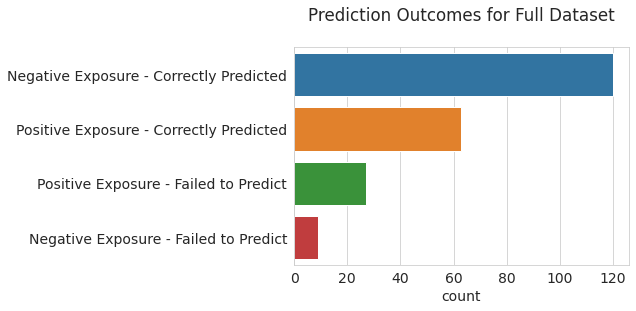

In [65]:

# plot prediction outcome totals 
ax = sns.countplot(data=pred_df, y='pred_result_label', order=pred_df['pred_result_label'].value_counts().index)

if get_version_number('matplotlib') > 3.5:
  plt.bar_label(ax.containers[0])

plt.ylabel('')
plt.title('Prediction Outcomes for Full Dataset\n')
plt.show()


In [67]:

pred_df.loc[(pred_df['pred_result']=='True Positive') | (pred_df['pred_result']=='True Negative'), 'correct_incorrect'] = 'Correct Prediction'
pred_df.loc[(pred_df['pred_result']=='False Positive') | (pred_df['pred_result']=='False Negative'), 'correct_incorrect'] = 'Incorrect Prediction'


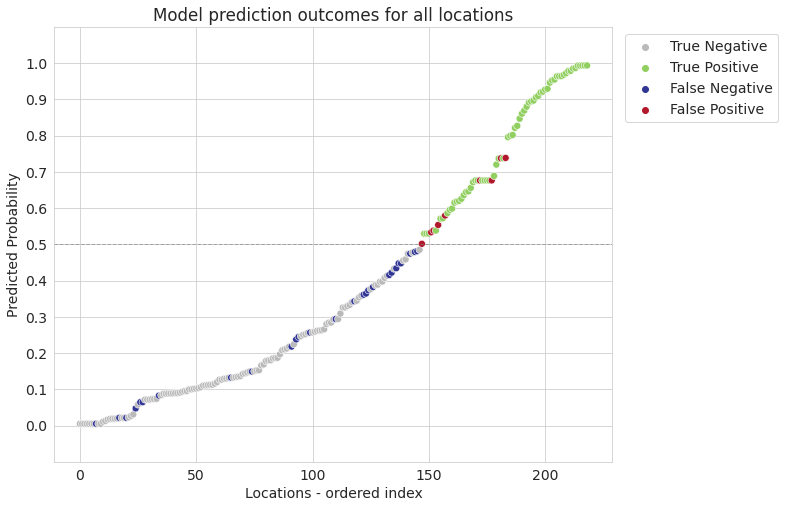

In [68]:

# plot probabilities by predicted class 

cutoff_threshold = .5

plot_df = pred_df.copy().sort_values('prob', ascending=True)
plot_df = plot_df.reset_index(drop=True)

font = {'size'   : 14}
plt.rc('font', **font)

fig = plt.figure(figsize=(10,8))

pal = {'True Positive': '#91cf60',
       'False Positive':'#b2182b',
       'True Negative': '#bababa',
       'False Negative':'#313695'}


plt.axhline(cutoff_threshold, linestyle='--', linewidth=1, color='gray', alpha=.6)
sns.scatterplot(x=plot_df.index, y=plot_df['prob'], 
                hue=plot_df['pred_result'], 
                hue_order=['True Negative','True Positive','False Negative','False Positive'],
                s=50,
                # alpha=.8,
                palette=pal, 
                )

plt.yticks(np.arange(0, 1.1, .1))
plt.ylim(-0.1,1.1)
# plt.grid(which='major', axis='y')

plt.xlabel('Locations - ordered index')
plt.ylabel('Predicted Probability')
plt.title('Model prediction outcomes for all locations')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');




# Model Analysis

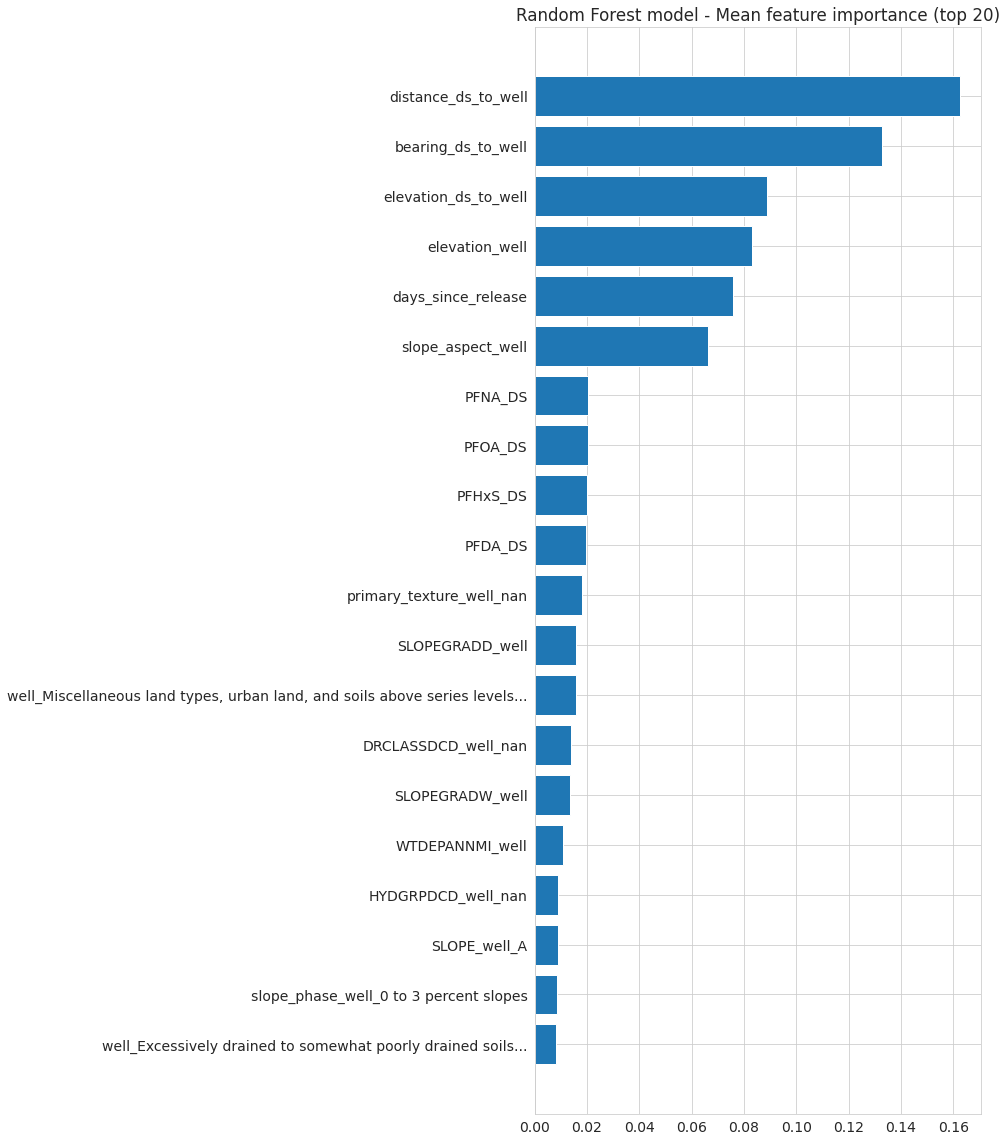

In [90]:

# get RF importance rankings for features

n_loops = 20
importance_df = pd.DataFrame()

for i in range(n_loops):

    X_train, X_val, y_train, y_val = train_test_split(X, 
                                                      y,
                                                      train_size=train_size)
    
    clf = clf.fit(X_train, y_train)
    importance = clf.feature_importances_
    importance_df = pd.concat([importance_df, pd.Series(importance)], axis=1)

importance_df['mean_importance'] = importance_df.mean(axis=1)
importance_df['feature'] = X_train.columns

	# map_unit_groups_well_Excessively drained to somewhat poorly drained soils formed in glacial outwash or lacustrine sediments

importance_df.loc[importance_df['feature']=='map_unit_groups_well_Excessively drained to somewhat poorly drained soils formed in glacial outwash or lacustrine sediments', 'feature'] = 'well_Excessively drained to somewhat poorly drained soils...'
importance_df.loc[importance_df['feature']=='map_unit_groups_well_Miscellaneous land types, urban land, and soils above series levels', 'feature'] = 'well_Miscellaneous land types, urban land, and soils above series levels...'


importance_df["rank"] = importance_df['mean_importance'].rank(ascending = False)
importance_df = importance_df[['feature','mean_importance', 'rank']].sort_values('rank', axis=0, ascending=False)
importance_df.reset_index(drop=True, inplace=True)


importance_df = importance_df.loc[importance_df['rank']<=20,]
plt.figure(figsize=(8, 20))
plt.barh(importance_df['feature'], 
         importance_df['mean_importance'])

plt.title('Random Forest model - Mean feature importance (top 20)')

plt.show()



In [33]:
importance_df.sort_values('rank')

,feature,mean_importance,rank
92,distance_ds_to_well,0.170023,1.0
91,bearing_ds_to_well,0.132517,2.0
90,elevation_ds_to_well,0.093067,3.0
89,elevation_well,0.078924,4.0
88,days_since_release,0.077135,5.0
87,slope_aspect_well,0.064201,6.0
86,primary_texture_well_nan,0.019689,7.0
85,PFDA_DS,0.018688,8.0
84,PFHxS_DS,0.018043,9.0
83,PFNA_DS,0.017760,10.0


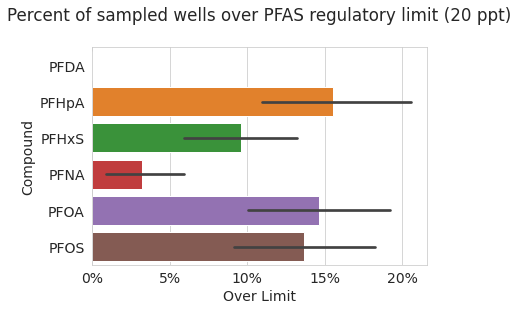

In [35]:

# plot percent of wells over regulatory limit

PFAS_results_long = data=df[regulated].melt(var_name='Compound', value_name='PFAS Level')
PFAS_results_long['Compound'] = PFAS_results_long['Compound'].str.replace('_well', '')
PFAS_results_long['Over Limit'] = PFAS_results_long['PFAS Level'] >= 20

ax = sns.barplot(data=PFAS_results_long, y='Compound', x='Over Limit')

x_value=['{:,.0f}'.format(x*100) + '%' for x in ax.get_xticks()]
ax.set_xticklabels(x_value)
plt.title('Percent of sampled wells over PFAS regulatory limit (20 ppt)\n');


# Mapping


In [83]:

# load disposal site locations
ds_locations = pd.read_parquet('../../disposal_sites/PFAS_Sites_2021-11-07_geocoded.parquet')


In [84]:

# add location info to predicted data

Xy['lat_x'] = df['lat_x']
Xy['lon_x'] = df['lon_x']

Xy.loc[Xy['response_PFAS6']==1, 'PFAS6 Exposure'] = 'Affected well (above limit)'
Xy.loc[Xy['response_PFAS6']==0, 'PFAS6 Exposure'] = 'Unaffected well'

ds_locations['Source'] = 'Site of Release'

pred_df['lat_x'] = df['lat_x']
pred_df['lon_x'] = df['lon_x']

# save prediction dataset
pred_df.to_csv('well exposure model prediction data.csv')


In [85]:

# Map where PFAS Releases have occurred

fig = px.scatter_mapbox(
                  Xy,
                  lat='lat_x', lon='lon_x', 
                  mapbox_style='carto-positron',
                  color='PFAS6 Exposure',
                  color_discrete_sequence=['red','blue'],
                  zoom=7.4,
                  center={'lat': 42.05, 'lon': -71.6},
                  opacity=1,            
                  title='Locations of Wells Sampled'
              ).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_traces(marker={'size': 12})

fig2 = px.scatter_mapbox(
                  ds_locations,
                  lat='lat', lon='lon', 
                  mapbox_style='carto-positron',
                  color='Source',
                  color_discrete_sequence=['black'],
                  zoom=7.4,
                  center={'lat': 42.05, 'lon': -71.6},
                  opacity=1,            
                  title='Locations of Wells Sampled'
              ).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig2.update_traces(marker={'size': 18})
fig.add_trace(fig2.data[0])


fig.update_layout(legend = dict(font = dict(size = 18, color = "black")))

fig.update_layout(
    autosize=False,
    margin={"r":0,"t":30,"l":0,"b":0},
    height=700,
    width=1000,                
  )

# set to False to enable interactive features: hover, scroll, zoom.  
config = {'staticPlot': False}
fig.show(config=config)


fig.write_html("Well Exposure Model PFAS exposed wells.html")



In [86]:

# map prediction outcomes

pred_df.loc[pred_df['response']==1, 'PFAS6 Exposure'] = 'Affected well (above limit)'
pred_df.loc[pred_df['response']==0, 'PFAS6 Exposure'] = 'Unaffected well'

fig = px.scatter_mapbox(
                  pred_df,
                  lat='lat_x', lon='lon_x', 
                  mapbox_style='carto-positron',
                  color='pred_result_label',
                                          
                  color_discrete_map={'Positive Exposure - Correctly Predicted':'red', 
                                      'Negative Exposure - Correctly Predicted':'blue',
                                      'Negative Exposure - Failed to Predict':'lightblue',
                                      'Positive Exposure - Failed to Predict':'orange'
                                      },
                  zoom=10,
                  center={'lat': 42.4, 'lon': -71.5},
                  opacity=1,                   
                  title='Model Prediction Outcomes'
              ).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig.update_traces(marker={'size': 12})

fig2 = px.scatter_mapbox(
                  ds_locations,
                  lat='lat', lon='lon', 
                  mapbox_style='carto-positron',
                  color='Source',
                  color_discrete_sequence=['black'], 
                  opacity=1,            
              ).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))

fig2.update_traces(marker={'size': 18})
fig.add_trace(fig2.data[0])

             
fig.update_layout(legend = dict(font = dict(size = 18, color = "black")))

fig.update_layout(
    autosize=False,
    margin={"r":0,"t":30,"l":0,"b":0},
    height=700,
    width=1200,                
  )

# set to False to enable interactive features: hover, scroll, zoom.  
config = {'staticPlot': False}
fig.show(config=config)


fig.write_html("Well Exposure Model predictions.html")
